In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from IPython.display import display

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(precision=3, suppress=True)

def show(text, element):
    print(text, ' = ')
    print(element)
    print()
    
def plot_regression(df, x_label, y_label, y_approximation_label, title):
    sns.set_style('darkgrid')
    
    # Plot the original data points (scatter)
    ax = df.plot.scatter(x_label, y_label, color='tomato', s=40, figsize=(10, 7))
    
    # Plot the regression curve joining the approximation points
    df.plot(x_label, y_approximation_label, alpha=0.5, ax=ax)
    
    # Connect the original data points to their projections on the regression line
    starts = df[[x_label, y_label]].apply(tuple, axis=1)
    ends = df[[x_label, y_approximation_label]].apply(tuple, axis=1)
    lc = LineCollection(list(zip(starts, ends)), colors='tomato', linewidth=1.5)
    ax.add_collection(lc)
    
    ax.set_title(title, y=1.03, size=18)
    ax.legend().set_visible(False)
    ax.set_xticks(df[x_label])
    
    ax.set_xlabel('Año')
    ax.set_ylabel('Población (millones)')
    ax.set_xlim([1968, 2017])

    return ax

## Datos

Año - Población total en millones:

In [3]:
data = [
    [1970, 1.282],
    [1980, 1.674],
    [1990, 2.003],
    [1995, 2.201],
    [2000, 2.299],
    [2005, 2.410],
    [2010, 2.585],
    [2015, 2.700],
]

x_data = [x for x, y in data]
y_data = [y for x, y in data]

## ( i ) Ajustar linealmente los datos

Resolvemos At * A (b, a) = At * y 

A  = 
[[    1.  1970.]
 [    1.  1980.]
 [    1.  1990.]
 [    1.  1995.]
 [    1.  2000.]
 [    1.  2005.]
 [    1.  2010.]
 [    1.  2015.]]

At * A  = 
[[        8.     15965.]
 [    15965.  31861775.]]

At * Y  = 
[    17.154  34283.425]

a  = 
0.0311206165703

b  = 
-59.9608304432

Calculamos los valores aproximados de Y y los errores^2


,x,y,y_approximation,error,error_squared
0,1970,1.282,1.347,-0.065,0.004
1,1980,1.674,1.658,0.016,0.000
2,1990,2.003,1.969,0.034,0.001
3,1995,2.201,2.125,0.076,0.006
4,2000,2.299,2.280,0.019,0.000
5,2005,2.410,2.436,-0.026,0.001
6,2010,2.585,2.592,-0.007,0.000
7,2015,2.700,2.747,-0.047,0.002


Residuo = 0.015


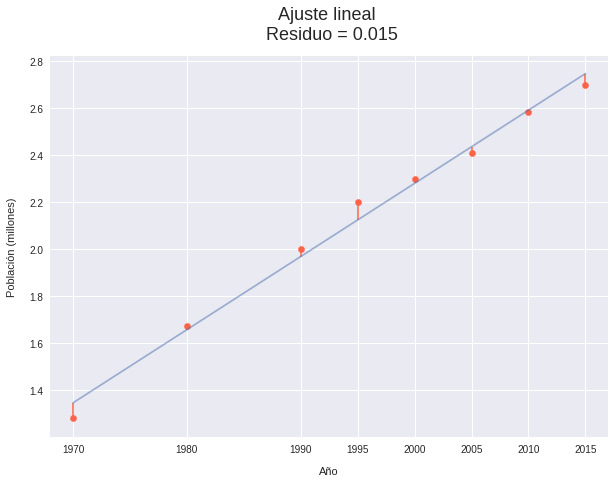

In [10]:
x = np.array(x_data)
y = np.array(y_data)

print('Resolvemos At * A (b, a) = At * y \n')

A = np.array([np.ones(len(x)), x]).transpose()
show('A', A)

At_A = np.matmul(A.transpose(), A)
show('At * A', At_A)

At_y = np.dot(A.transpose(), y)
show('At * Y', At_y)

b, a = np.linalg.solve(At_A, At_y)
show('a', a)
show('b', b)

print('Calculamos los valores aproximados de Y y los errores^2')

data_1 = pd.DataFrame()

data_1['x'] = x
data_1['y'] = y
data_1['y_approximation'] = a * x + b
data_1['error'] = data_1['y'] - data_1['y_approximation']
data_1['error_squared'] = np.power(data_1['error'], 2)

display(data_1)

residual = round(data_1['error_squared'].sum(), 3)
print('Residuo =', residual)

title = 'Ajuste lineal \n Residuo = {}'.format(residual)
ax = plot_regression(data_1, 'x', 'y', 'y_approximation', title=title)

## ( ii ) Ajuste con una curva de la forma $P(t) = b \cdot t^a$

Transformamos el modelo para obtener una ecuación lineal:

$ y = b \cdot t^a $

$ ln(y) = ln(b \cdot t^a) $

$ ln(y) = ln(b) + a \cdot ln(t) $

Y realizamos el ajuste lineal sobre esta ecuación, buscando $ln(b)$ y $a$. Obtenemos un estimado de ln(y).

Con este estimado, "recuperamos" el y estimado haciendo e^(ln(y)).

,x,y,ln_x,ln_y
0,1970,1.282,7.586,0.248
1,1980,1.674,7.591,0.515
2,1990,2.003,7.596,0.695
3,1995,2.201,7.598,0.789
4,2000,2.299,7.601,0.832
5,2005,2.410,7.603,0.880
6,2010,2.585,7.606,0.950
7,2015,2.700,7.608,0.993


Resolvemos el sistema At*A (b, a) = At*y usando los valores de ln(x) y ln(y): 

A  = 
[[ 1.     7.586]
 [ 1.     7.591]
 [ 1.     7.596]
 [ 1.     7.598]
 [ 1.     7.601]
 [ 1.     7.603]
 [ 1.     7.606]
 [ 1.     7.608]]

At * A  = 
[[   8.      60.789]
 [  60.789  461.921]]

At * y  = 
[  5.902  44.863]

ln(b)  = 
-241.849

a  = 
31.925

Calculamos y_approximation como e^(ln_y_approximation)


,x,y,ln_x,ln_y,ln_y_approximation,y_approximation,error,error_squared
0,1970,1.282,7.586,0.248,0.326,1.385,-0.103,0.011
1,1980,1.674,7.591,0.515,0.488,1.628,0.046,0.002
2,1990,2.003,7.596,0.695,0.648,1.913,0.090,0.008
3,1995,2.201,7.598,0.789,0.729,2.072,0.129,0.017
4,2000,2.299,7.601,0.832,0.809,2.245,0.054,0.003
5,2005,2.410,7.603,0.880,0.888,2.431,-0.021,0.000
6,2010,2.585,7.606,0.950,0.968,2.632,-0.047,0.002
7,2015,2.700,7.608,0.993,1.047,2.849,-0.149,0.022


Residuo =  0.065


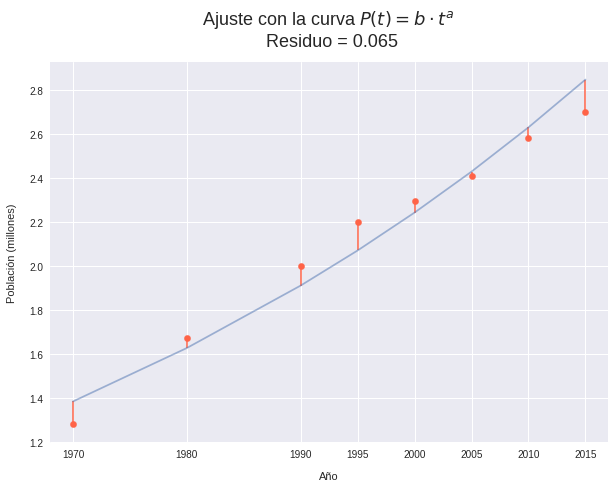

In [7]:
data_2 = pd.DataFrame()

data_2['x'] = np.array(x_data)
data_2['y'] = np.array(y_data)
data_2['ln_x'] = np.log(data_2['x'])
data_2['ln_y'] = np.log(data_2['y'])

display(data_2)

print('Resolvemos el sistema At*A (b, a) = At*y usando los valores de ln(x) y ln(y): \n')

A = np.array([np.ones(len(data_2['ln_x'])), data_2['ln_x']]).transpose()
At_A = np.matmul(A.transpose(), A)
At_y = np.matmul(A.transpose(), data_2['ln_y'])

show('A', A)
show('At * A', At_A)
show('At * y', At_y)

ln_b, a = np.linalg.solve(At_A, At_y)

show('ln(b)', round(ln_b, 3))
show('a', round(a, 3))

data_2['ln_y_approximation'] = a * data_2['ln_x'] + ln_b
data_2['y_approximation'] = np.exp(data_2['ln_y_approximation'])

# data_2['error'] = data_2['ln_y'] - data_2['ln_y_approximation']
# data_2['error_squared'] = np.power(data_2['error'], 2)

data_2['error'] = data_2['y'] - data_2['y_approximation']
data_2['error_squared'] = np.power(data_2['error'], 2)

print('Calculamos y_approximation como e^(ln_y_approximation)')
display(data_2)

residual = round(sum(data_2['error_squared']), 3)
print('Residuo = ', residual)

title = ('Ajuste con la curva $P(t) = b \cdot t^a$ \n Residuo = {}'
         .format(residual))
ax = plot_regression(data_2, 'x', 'y', 'y_approximation', title=title)

## ( iii ) Ajuste con la función $ E(t) = b \cdot e^{at} $

Transformamos el modelo para obtener una ecuación lineal:

$ y = b \cdot e^{at} $

$ ln(y) = ln(b) + ln(e) \cdot a \cdot t $

$ ln(y) = ln(b) + a \cdot t $

Realizamos el ajuste lineal sobre esta última ecuación.


,x,y,ln_y
0,1970,1.282,0.248
1,1980,1.674,0.515
2,1990,2.003,0.695
3,1995,2.201,0.789
4,2000,2.299,0.832
5,2005,2.410,0.880
6,2010,2.585,0.950
7,2015,2.700,0.993


A  = 
[[    1.  1970.]
 [    1.  1980.]
 [    1.  1990.]
 [    1.  1995.]
 [    1.  2000.]
 [    1.  2005.]
 [    1.  2010.]
 [    1.  2015.]]

At * A  = 
[[        8.     15965.]
 [    15965.  31861775.]]

At * y  = 
[     5.902  11804.693]

ln(b)  = 
-31.215

a  = 
0.016



,x,y,ln_y,ln_y_approximation,y_approximation,error,error_squared
0,1970,1.282,0.248,0.327,1.387,-0.105,0.011
1,1980,1.674,0.515,0.488,1.628,0.046,0.002
2,1990,2.003,0.695,0.648,1.911,0.092,0.008
3,1995,2.201,0.789,0.728,2.070,0.131,0.017
4,2000,2.299,0.832,0.808,2.243,0.056,0.003
5,2005,2.410,0.880,0.888,2.430,-0.020,0.000
6,2010,2.585,0.950,0.968,2.633,-0.048,0.002
7,2015,2.700,0.993,1.048,2.852,-0.152,0.023


Residuo = 0.068


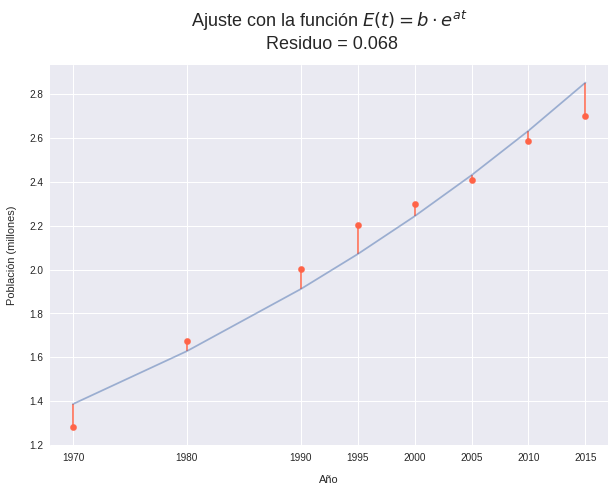

In [6]:
data_3 = pd.DataFrame()
data_3['x'] = x_data
data_3['y'] = y_data
data_3['ln_y'] = np.log(data_3['y'])

display(data_3)

A = np.array([np.ones(len(data_3['x'])), data_3['x']]).transpose()
At_A = np.matmul(A.transpose(), A)
At_y = np.matmul(A.transpose(), data_3['ln_y'])

show('A', A)
show('At * A', At_A)
show('At * y', At_y)

ln_b, a = np.linalg.solve(At_A, At_y)

show('ln(b)', round(ln_b, 3))
show('a', round(a, 3))

data_3['ln_y_approximation'] = a * data_3['x'] + ln_b
data_3['y_approximation'] = np.exp(data_3['ln_y_approximation'])
data_3['error'] = data_3['y'] - data_3['y_approximation']
data_3['error_squared'] = np.power(data_3['error'], 2)

display(data_3)

residual = round(data_3['error_squared'].sum(), 3)
print('Residuo =', residual)

title = ('Ajuste con la función $ E(t) = b \cdot e^{{at}} $ \n Residuo = {}'
         .format(round(residual, 3)))
ax = plot_regression(data_3, 'x', 'y', 'y_approximation', title=title)

## ( iv ) Las tres curvas en el mismo gráfico

,x,y,model_1_y,model_1_error_squared,model_2_y,model_2_error_squared,model_3_y,model_3_error_squared
0,1970,1.282,1.347,0.004,1.385,0.011,1.387,0.011
1,1980,1.674,1.658,0.000,1.628,0.002,1.628,0.002
2,1990,2.003,1.969,0.001,1.913,0.008,1.911,0.008
3,1995,2.201,2.125,0.006,2.072,0.017,2.070,0.017
4,2000,2.299,2.280,0.000,2.245,0.003,2.243,0.003
5,2005,2.410,2.436,0.001,2.431,0.000,2.430,0.000
6,2010,2.585,2.592,0.000,2.632,0.002,2.633,0.002
7,2015,2.700,2.747,0.002,2.849,0.022,2.852,0.023


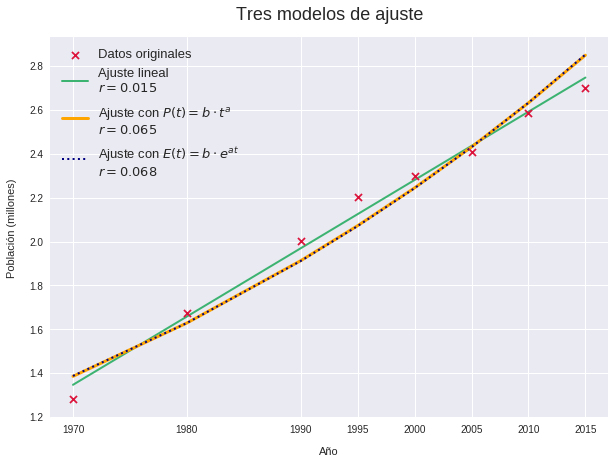

In [142]:
results = pd.DataFrame({})

results['x'] = data_1['x']
results['y'] = data_1['y']

for n, model in enumerate([data_1, data_2, data_3]):
    results['model_{}_y'.format(n+1)] = model['y_approximation']
    results['model_{}_error_squared'.format(n+1)] = model['error_squared']

display(results)

options = {
    'data': dict(
        marker='x',
        s=50,
        color='Crimson',
        zorder=10,
    ),
    'model_1': dict(
        label='Ajuste lineal',
        color='MediumSeaGreen',
        linewidth=2,
    ),
    'model_2': dict(
        label='Ajuste con $ P(t) = b \cdot t^a $', 
        color='Orange',
        linewidth=3,
    ),
    'model_3': dict(
        label='Ajuste con $ E(t) = b \cdot e^{at} $',
        color='Navy',
        linestyle='dotted',
        linewidth=2,
    )
}

sns.set_style('darkgrid')

ax = results.plot.scatter('x', 'y', **options['data'], figsize=(10, 7),
                          label='Datos originales')

for model in ['model_1', 'model_2', 'model_3']:
    residual = results['{}_error_squared'.format(model)].sum()
    opts = options[model]
    opts['label'] += '\n$ r = {:.3f} $'.format(residual)
    results.plot.line('x', '{}_y'.format(model), ax=ax, **opts)

ax.set_xlim([1968, 2017])
ax.set_xticks(results['x'])
ax.set_xlabel('Año')
ax.set_ylabel('Población (millones)')
ax.set_title('Tres modelos de ajuste', y=1.03, size=18)

handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[-1]] + handles[0:3],
          [labels[-1]] + labels[0:3], fontsize=13)

None

([<matplotlib.collections.PathCollection at 0x7f945e7718d0>,
 ['Datos originales',
  'Ajuste lineal\nResiduo = 0.015',
  'Ajuste con $ P(t) = b \\cdot t^a $\nResiduo = 0.065',
  'Ajuste con $ E(t) = b \\cdot e^{at} $\nResiduo = 0.068'])

## ( v ) Error para cada uno de los modelos

El modelo lineal es el que tiene menor error:

In [32]:
residuals = results.filter(like='error').sum()
show('Residuo de cada modelo', residuals)

Residuo de cada modelo  = 
model_1_error_squared   0.015
model_2_error_squared   0.065
model_3_error_squared   0.068
dtype: float64

